In [83]:
#make the necessary imports
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score,cross_validate
from sklearn import model_selection

from datetime import datetime


from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB


from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

# set jupyter's max row display
pd.set_option('display.max_row', 1000)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

In [84]:
#disable auto-scrolling

In [85]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

In [86]:
#Load 'globalterrorism.csv'

data = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')

C:\Users\Iptisha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
# structure of your dataset? (shape)
data.shape

(181691, 135)

In [88]:
#main feature(s) in your dataset? (column names)
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [89]:
#features as Categorical or Continuous. (head/tail)
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,...,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1.0,2.0,Other Crime Type,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,NaN,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,NaN,"1/3/1970: Karl Armstrong, a member of the New ...",1,1,1,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


### 1. Exploratory Data Analysis

In [90]:
data.isna().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [91]:
#There are many missing values and lot of text data as notes

In [92]:
len(data[data['gname']=="Unknown"])/len(data)*100

45.561970598433604

In [93]:
#The dataset contains a huge number of "Unknown"s in Group Name. About 46%. 
# These rows should be removed due to two reasons:
#1.) They have a huge proportion in dataset
#2.) Learning them doesn't make any sense.

In [94]:
len(data['gname'].unique())

#There are 3,537 unique classes i.e., different terrorist groups in the dataset.

3537

Text(0,0.5,'Terrorist Group Name')

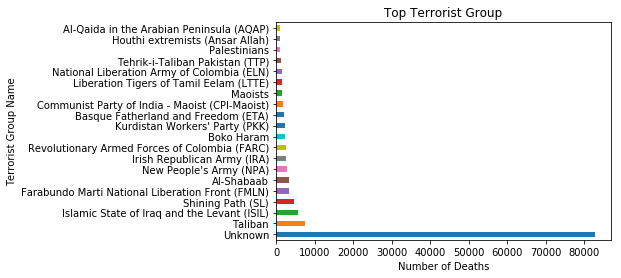

In [95]:
top_gname = data.gname.value_counts()
ax = top_gname.iloc[:20].plot(kind="barh")
ax.set_title("Top Terrorist Group")
ax.set_xlabel("Number of Deaths")
ax.set_ylabel("Terrorist Group Name")


#There are many unknowns, as we identified above

In [96]:
class_freq = data[data['gname']!='Unknown']['gname'].value_counts() 
class_freq.tail(100)



Abu Tira (Central Reserve Forces)                                                                                   1
Latvian Republic Volunteer Troops                                                                                   1
Holders of the Black Banners                                                                                        1
P.R.E.                                                                                                              1
Organization for the oppresed in Egypt's Prisons                                                                    1
Terai Janatantrik Party                                                                                             1
Serbian Gangsters                                                                                                   1
Socialist Recovery Movement                                                                                         1
Anti-government rioters                                 

In [232]:
class_freq.head(100)


Taliban                                                        7478
Islamic State of Iraq and the Levant (ISIL)                    5613
Shining Path (SL)                                              4555
Farabundo Marti National Liberation Front (FMLN)               3351
Al-Shabaab                                                     3288
New People's Army (NPA)                                        2772
Irish Republican Army (IRA)                                    2671
Revolutionary Armed Forces of Colombia (FARC)                  2487
Boko Haram                                                     2418
Kurdistan Workers' Party (PKK)                                 2310
Basque Fatherland and Freedom (ETA)                            2024
Communist Party of India - Maoist (CPI-Maoist)                 1878
Maoists                                                        1630
Liberation Tigers of Tamil Eelam (LTTE)                        1606
National Liberation Army of Colombia (ELN)      

In [97]:
#The distribution of classes is highly skewed. There are many classes that only appear once in entire data (These are outliers).
#They need to be removed as the learning algorithm won't be able to learn it. There are many classes to remove,
#but how to decide which to remove and which not. Well, lets decide a threshold value of "number of occurrence" of a class. 
#Example threshold = 200, any class having number of occurances less than class_freq[threshold] will be removed. 
#The value of threshold can be anything, for now lets choose 200

#Above value of threshold will be used in the prediction model.

In [98]:
threshold = 100
class_freq = data[data['gname']!='Unknown']['gname'].value_counts()

#Frequency table of Terrorist groups, sorted by default in descending order

# this value is frequency of class at 300th index. i.e., 53
class_freq[threshold]

136

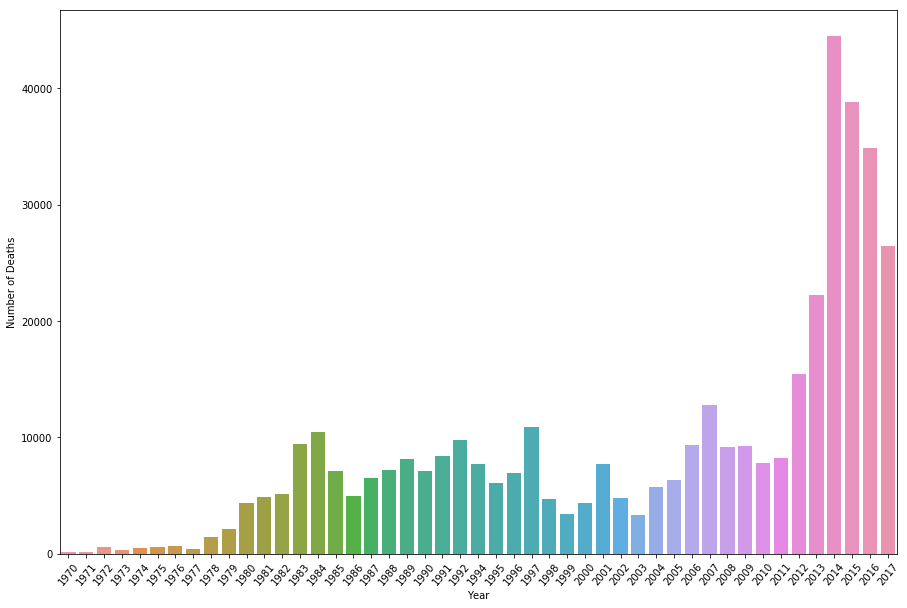

In [99]:
data['nkill'].fillna(0)
no_of_kills = data.groupby('iyear')['nkill'].sum()
plt.subplots(figsize=(15,10))
plot1 = sns.barplot(no_of_kills.index,no_of_kills)
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Deaths")
plot1.set_xticklabels(no_of_kills.index,rotation=50)
plt.show()

In [100]:
#From the graph we can see that the number of kills in 2001 was significantly higher.
#It is because about 3000 deaths have been reported during the attacks of 9/11. The number decreases after that maybe because 
#of decreasing terrorist activity due to subsequent measures taken by U.S. government and rest of the world. 
#It rose during second decade of 21st century due to birth and rise of infamous terrorist groups like ISIS, ISIL, Taliban etc.

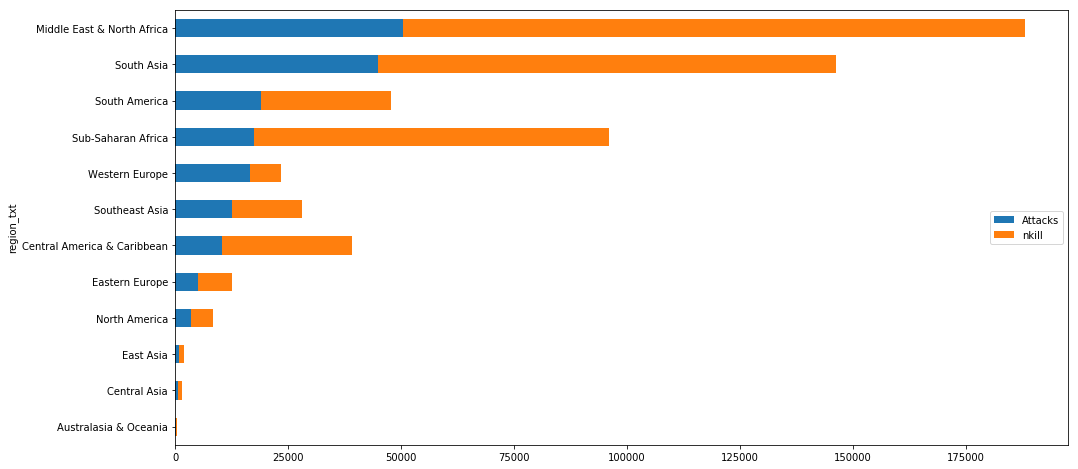

In [101]:
data['region_txt'].value_counts(ascending=True).to_frame().reset_index().rename(columns={'index':'region_txt','region_txt':'Attacks'}).merge(data[['nkill','region_txt']].groupby('region_txt').sum().reset_index(),on='region_txt').plot.barh(x='region_txt',y=['Attacks','nkill'],figsize=(16,8),stacked=True)
plt.legend(loc=5)

#African and South Asian countries have more number of terroist attacks

Text(0,0.5,'Country')

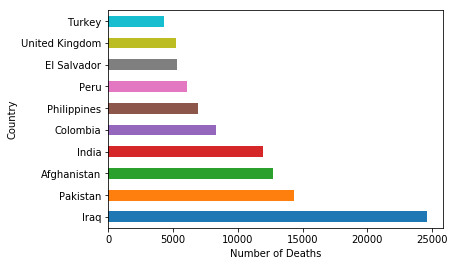

In [102]:
Country_text = data.country_txt.value_counts()
ax = Country_text.iloc[:10].plot(kind="barh")
ax.set_xlabel("Number of Deaths")
ax.set_ylabel("Country")

#top 5 countries with most number of attacks are - Iraq, Pakistan, Afganistan, India and Colombia

Text(0,0.5,'Country')

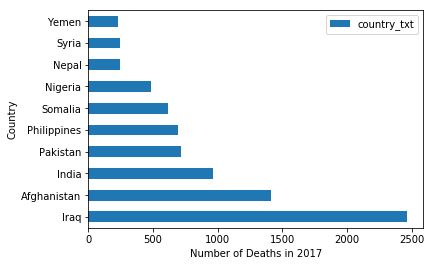

In [103]:
d = pd.DataFrame(data[data['iyear']==2017]['country_txt'].value_counts(sort=True)[:10])
ax = d.iloc[:20].plot(kind="barh")
ax.set_xlabel("Number of Deaths in 2017")
ax.set_ylabel("Country")

#for the year 2017, the top 5 dangerous countries almost remains constant(Columbia being replaced by Philippines)

C:\Users\Iptisha\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


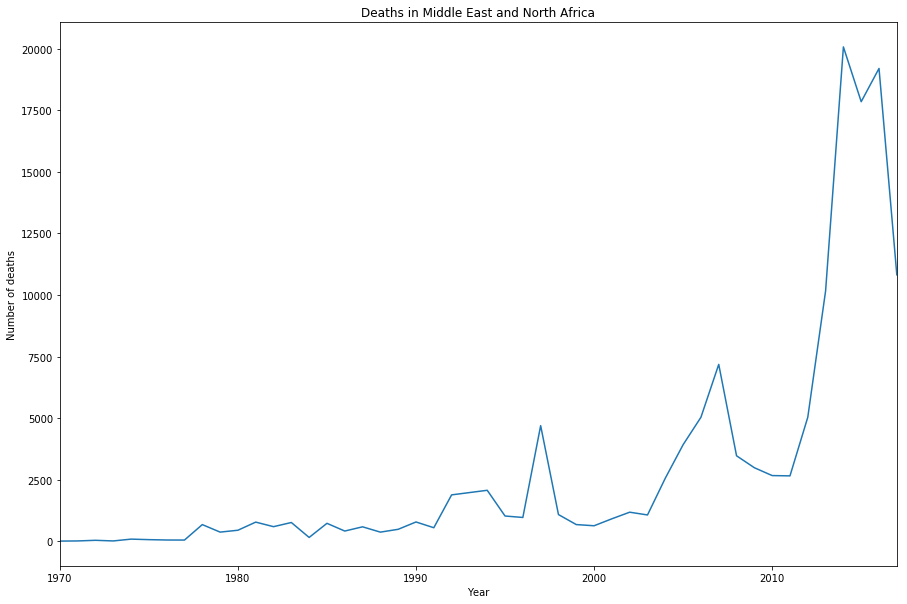

In [104]:
#Above insight can be verified by below graph, which shows the number of kills in Middle East region. 
#It has been growing ever since 2010 i.e., during increasing conflicts in Syria,

plt.subplots(figsize=(15,10))
d = data[data['region_txt']=='Middle East & North Africa']
d3 = pd.DataFrame(d.groupby(['iyear'])['nkill'].sum())
d3.reset_index(inplace=True)
d3['dummy']=0
l = sns.tsplot(time="iyear",value="nkill",data=d3,unit="dummy")
l.set_title("Deaths in Middle East and North Africa")
l.set_xlabel("Year")
l.set_ylabel("Number of deaths")
plt.show(l)

In [105]:
def attacks_terr(data):
    plt.subplots(figsize=(15,10))
    d = pd.DataFrame(data.groupby(['gname','iyear'])['iyear'].count())
    d.columns=['Number_of_Attacks']
    d.reset_index(inplace=True)
    d2 = d.loc[d['gname'].isin(data['gname'].value_counts().sort_values(ascending=False).index[:10])]
    d2 = d2.pivot(index='gname',columns='iyear',values='Number_of_Attacks').fillna(0)
    d2 = pd.DataFrame(d2.unstack(level=0))
    d2.reset_index(inplace=True)
    d2.columns=['Year','Terrorist Group','Number of Attacks']
    color_set = ["#e82727","#ff8649","#ffc549","#fced20","#8fe222","#22e28e","#22e2db","#1f85c4","#361599","#d11fce"]
    d2['dummy']=0
    sns.tsplot(time='Year',value='Number of Attacks',condition='Terrorist Group',data=d2,unit='dummy',color = sns.color_palette(color_set))
    plt.show()

C:\Users\Iptisha\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


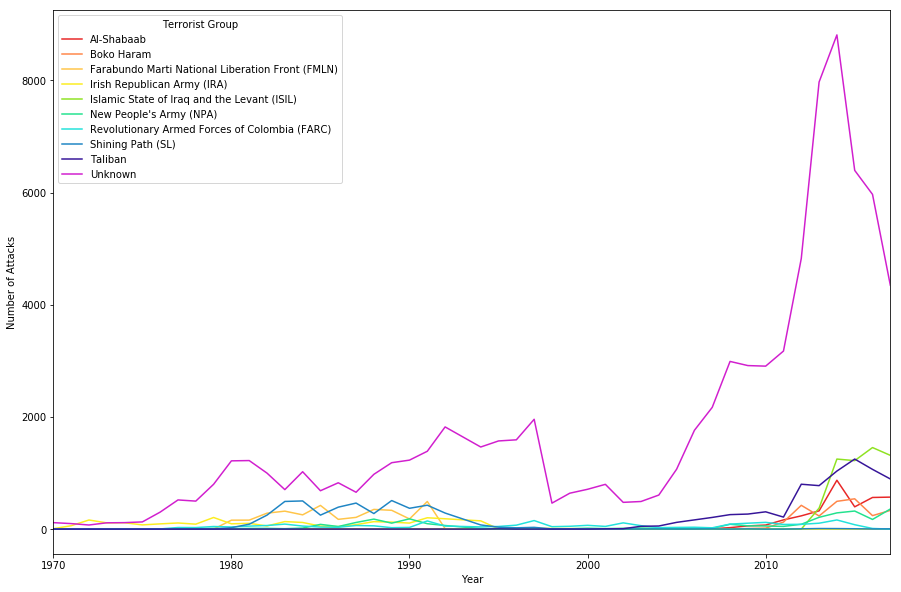

In [106]:

attacks_terr(data)

#It can be inferred from graph that Islamic State of Iraq and the Levant (ISIL) is one of the fastest growing groups

C:\Users\Iptisha\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


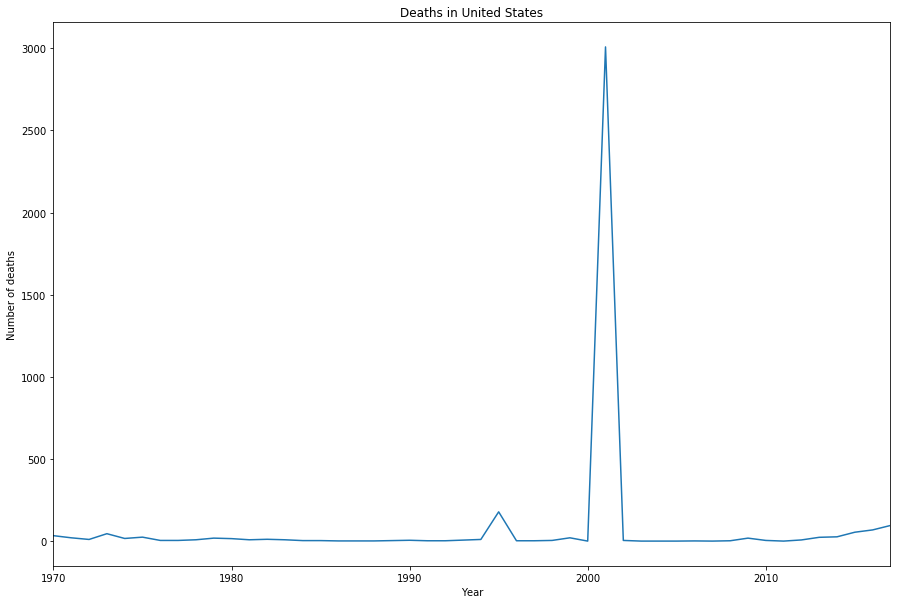

In [107]:
plt.subplots(figsize=(15,10))
d = data[data['country_txt']=='United States']
d3 = pd.DataFrame(d.groupby(['iyear'])['nkill'].sum())
d3.reset_index(inplace=True)
d3['dummy']=0
l = sns.tsplot(time="iyear",value="nkill",data=d3,unit="dummy")
l.set_title("Deaths in United States")
l.set_xlabel("Year")
l.set_ylabel("Number of deaths")
plt.show(l)

In [108]:
# we can see the attacks of 9/11

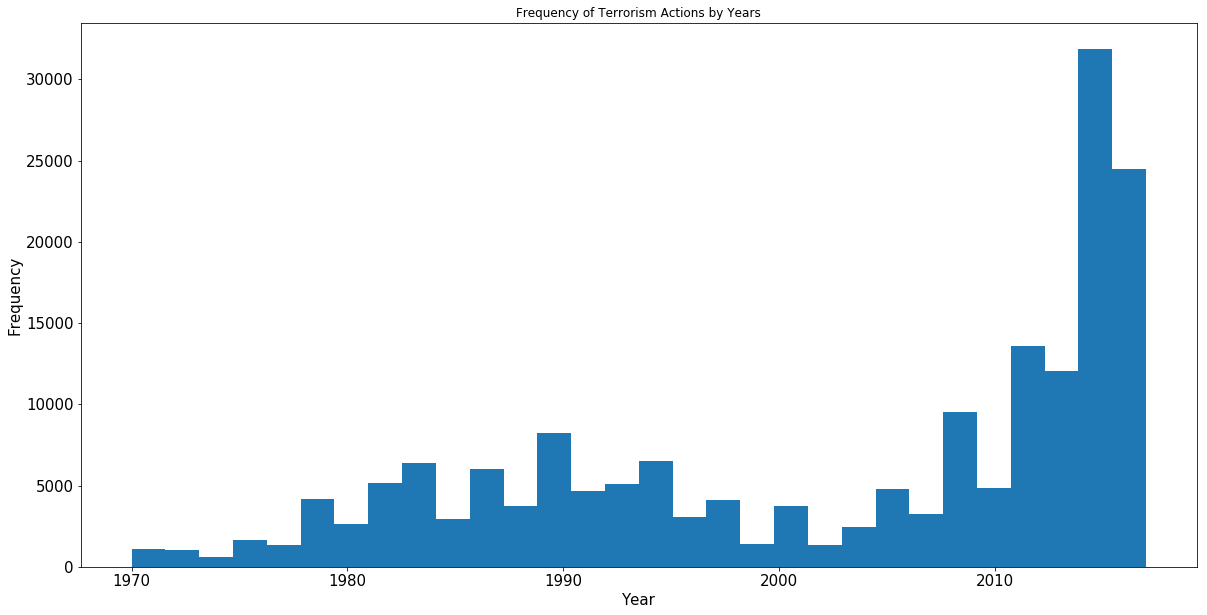

In [109]:
# Histogram plot
# bins = number of bar in figure
data.iyear.plot(kind = 'hist', bins = 30, figsize = (20,10), fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Terrorism Actions by Years')
plt.show()

### 2. Cleaning the Data 

In [110]:
# Remove "Unknown" groups, they contribute almost half to data.

data = data[data['gname']!='Unknown']


In [111]:
class_freq = data[data['gname']!='Unknown']['gname'].value_counts() 

In [112]:
data = data[data['gname'].isin(class_freq.index[:threshold])] 

In [113]:
data['gname'].value_counts() 


Taliban                                                        7478
Islamic State of Iraq and the Levant (ISIL)                    5613
Shining Path (SL)                                              4555
Farabundo Marti National Liberation Front (FMLN)               3351
Al-Shabaab                                                     3288
New People's Army (NPA)                                        2772
Irish Republican Army (IRA)                                    2671
Revolutionary Armed Forces of Colombia (FARC)                  2487
Boko Haram                                                     2418
Kurdistan Workers' Party (PKK)                                 2310
Basque Fatherland and Freedom (ETA)                            2024
Communist Party of India - Maoist (CPI-Maoist)                 1878
Maoists                                                        1630
Liberation Tigers of Tamil Eelam (LTTE)                        1606
National Liberation Army of Colombia (ELN)      

In [114]:
data.shape


(75527, 135)

In [115]:
#Selecting a subset of columns for random forest to identify the important features

data.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended Incident','country':'Country','region':'Region','crit1':'Criterion 1','crit2':'Criterion 2','crit3':'Criterion 3','attacktype1':'AttackType','gname':'Group','suicide':'Suicide Attack','multiple':'Multiple','targtype1':'Target','nkill':'Killed','nwound':'Wounded','natlty1':'Nationality','weaptype1':'Weapon_type','INT_LOG':'International- Logistical','INT_IDEO':'International- Ideological','guncertain1':'Group Suspected','success':'Success'},inplace=True)
data1=data[['Event_ID','Year','Month','Day','Extended Incident','Country','Region','Criterion 1','Criterion 2','Criterion 3','AttackType','Group','Killed','Wounded','Target','Suicide Attack','Multiple','Nationality','Weapon_type','International- Logistical','International- Ideological','Group Suspected','Success']]





In [116]:
data1.shape

(75527, 23)

In [117]:
data1.isna().sum()

Event_ID                         0
Year                             0
Month                            0
Day                              0
Extended Incident                0
Country                          0
Region                           0
Criterion 1                      0
Criterion 2                      0
Criterion 3                      0
AttackType                       0
Group                            0
Killed                        5713
Wounded                       9655
Target                           0
Suicide Attack                   0
Multiple                         0
Nationality                    500
Weapon_type                      0
International- Logistical        0
International- Ideological       0
Group Suspected                373
Success                          0
dtype: int64

In [118]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75527 entries, 11 to 181688
Data columns (total 23 columns):
Event_ID                      75527 non-null float64
Year                          75527 non-null int64
Month                         75527 non-null int64
Day                           75527 non-null int64
Extended Incident             75527 non-null int64
Country                       75527 non-null int64
Region                        75527 non-null int64
Criterion 1                   75527 non-null int64
Criterion 2                   75527 non-null int64
Criterion 3                   75527 non-null int64
AttackType                    75527 non-null int64
Group                         75527 non-null object
Killed                        69814 non-null float64
Wounded                       65872 non-null float64
Target                        75527 non-null int64
Suicide Attack                75527 non-null int64
Multiple                      75527 non-null float64
Nationality  

In [119]:
data1_dropNA = data1.dropna(inplace=False)

In [120]:
data1_dropNA.shape

(64722, 23)

In [121]:
data1_dropNA = data1_dropNA[(data1_dropNA['International- Ideological'] >= 0)]

In [122]:
data1_dropNA = data1_dropNA[(data1_dropNA['International- Logistical'] >= 0)]

In [123]:
print(data1_dropNA['International- Logistical'].value_counts())

0    55648
1     3868
Name: International- Logistical, dtype: int64


In [124]:
print(data1_dropNA['International- Ideological'].value_counts())

0    45250
1    14266
Name: International- Ideological, dtype: int64


In [125]:
data1_dropNA.isna().sum()

Event_ID                      0
Year                          0
Month                         0
Day                           0
Extended Incident             0
Country                       0
Region                        0
Criterion 1                   0
Criterion 2                   0
Criterion 3                   0
AttackType                    0
Group                         0
Killed                        0
Wounded                       0
Target                        0
Suicide Attack                0
Multiple                      0
Nationality                   0
Weapon_type                   0
International- Logistical     0
International- Ideological    0
Group Suspected               0
Success                       0
dtype: int64

In [126]:
#target Variable transforming
le = preprocessing.LabelEncoder()
data1_dropNA=data1_dropNA.copy()
data1_dropNA['Group'] = le.fit_transform(data1_dropNA['Group']) #Encode all groups
y = data1_dropNA['Group']

In [127]:
y.shape

(59516,)

In [128]:
#mapped values
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Abu Sayyaf Group (ASG)': 0, 'African National Congress (South Africa)': 1, 'Al-Aqsa Martyrs Brigade': 2, "Al-Gama'at al-Islamiyya (IG)": 3, 'Al-Nusrah Front': 4, 'Al-Qaida in Iraq': 5, 'Al-Qaida in the Arabian Peninsula (AQAP)': 6, 'Al-Qaida in the Islamic Maghreb (AQIM)': 7, 'Al-Shabaab': 8, 'Algerian Islamic Extremists': 9, 'Allied Democratic Forces (ADF)': 10, 'Armed Islamic Group (GIA)': 11, 'Armenian Secret Army for the Liberation of Armenia': 12, 'Baloch Liberation Army (BLA)': 13, 'Baloch Liberation Front (BLF)': 14, 'Baloch Republican Army (BRA)': 15, 'Bangsamoro Islamic Freedom Movement (BIFM)': 16, 'Barqa Province of the Islamic State': 17, 'Basque Fatherland and Freedom (ETA)': 18, 'Boko Haram': 19, 'Chechen Rebels': 20, 'Communist Party of India - Maoist (CPI-Maoist)': 21, 'Corsican National Liberation Front (FLNC)': 22, 'Democratic Revolutionary Alliance (ARDE)': 23, 'Dev Sol': 24, "Donetsk People's Republic": 25, 'Farabundo Marti National Liberation Front (FMLN)': 26, '

In [129]:
X=data1_dropNA.drop(columns=['Group','Event_ID']) 

In [130]:
X.shape

(59516, 21)

In [131]:
#Finding important features using Random Forest
#order is important, 30% test with random selection
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=1)

In [132]:
print(X_train_rf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41661 entries, 6393 to 98971
Data columns (total 21 columns):
Year                          41661 non-null int64
Month                         41661 non-null int64
Day                           41661 non-null int64
Extended Incident             41661 non-null int64
Country                       41661 non-null int64
Region                        41661 non-null int64
Criterion 1                   41661 non-null int64
Criterion 2                   41661 non-null int64
Criterion 3                   41661 non-null int64
AttackType                    41661 non-null int64
Killed                        41661 non-null float64
Wounded                       41661 non-null float64
Target                        41661 non-null int64
Suicide Attack                41661 non-null int64
Multiple                      41661 non-null float64
Nationality                   41661 non-null float64
Weapon_type                   41661 non-null int64
International

In [133]:
print(X_test_rf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17855 entries, 5912 to 16542
Data columns (total 21 columns):
Year                          17855 non-null int64
Month                         17855 non-null int64
Day                           17855 non-null int64
Extended Incident             17855 non-null int64
Country                       17855 non-null int64
Region                        17855 non-null int64
Criterion 1                   17855 non-null int64
Criterion 2                   17855 non-null int64
Criterion 3                   17855 non-null int64
AttackType                    17855 non-null int64
Killed                        17855 non-null float64
Wounded                       17855 non-null float64
Target                        17855 non-null int64
Suicide Attack                17855 non-null int64
Multiple                      17855 non-null float64
Nationality                   17855 non-null float64
Weapon_type                   17855 non-null int64
International

In [134]:
X_test_rf.shape

(17855, 21)

In [135]:
X_train_rf.shape

(41661, 21)

In [136]:
y_train_rf.shape

(41661,)

In [137]:
y_test_rf.shape

(17855,)

### 3. Feature Selection 

In [138]:
# Variable importance
rf = RandomForestClassifier()  
rf.fit(X_train_rf,y_train_rf)
print ("Features sorted by their score:" )
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train_rf), reverse=True) )

Features sorted by their score:
[(0.2551, 'Country'), (0.1855, 'Nationality'), (0.1484, 'Region'), (0.1202, 'Year'), (0.0446, 'International- Ideological'), (0.0435, 'Day'), (0.0366, 'Month'), (0.0344, 'Target'), (0.0239, 'Killed'), (0.0214, 'AttackType'), (0.0202, 'Wounded'), (0.017, 'Weapon_type'), (0.0137, 'International- Logistical'), (0.0083, 'Multiple'), (0.0081, 'Group Suspected'), (0.0059, 'Criterion 3'), (0.0045, 'Success'), (0.0042, 'Extended Incident'), (0.0037, 'Suicide Attack'), (0.0009, 'Criterion 2'), (0.0001, 'Criterion 1')]


### 4. Model Selection

### Decision Tree Classifier 

In [139]:
print("Decision Tree Classifier")
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_rf, y_train_rf)

Decision Tree Classifier


In [140]:
y_pred = clf.predict(X_test_rf)
print("Precision: %0.2f" %precision_score(y_test_rf, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test_rf, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test_rf, y_pred , average="macro"))

Precision: 0.76
Recall:  0.76
F1-score:  0.76


In [141]:
#The F1 score is low, we need to better process the data to increase the scores

### Random Forest Classifier 

In [142]:
print("Random Forest Classifier")
rf = RandomForestClassifier()  
rf.fit(X_train_rf,y_train_rf)

Random Forest Classifier


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
y_pred = rf.predict(X_test_rf)
print("Precision: %0.2f" %precision_score(y_test_rf, y_pred , average="macro"))
print("Recall:  %0.2f" %recall_score(y_test_rf, y_pred , average="macro"))
print("F1-score:  %0.2f" %f1_score(y_test_rf, y_pred , average="macro"))

Precision: 0.80
Recall:  0.75
F1-score:  0.76


C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
#The F1 score is still low but the precision is slightly better, we need to better process the data to increase the scores

In [145]:
#Random Forest has a better Precision and F1 score
#Modeling with only important features and using cross validation to improve the model performance

### 5. Modeling -  Ramdom Forest with Important Features and CV to predict the group responsible 

In [146]:
X_CV=X[['Country','Nationality','Region','Year','Day','Month','International- Ideological','Target','Killed','AttackType','Wounded','Weapon_type']]


In [147]:
y_cv=y.copy()

In [148]:
X_CV.shape

(59516, 12)

In [149]:
y_cv.shape

(59516,)

In [150]:
# for CV, converting to numpy array
X = np.array(X_CV)
y = np.array(y_cv)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [152]:
print("Random Forest Classifier With CV and Feature Selection")
rf = RandomForestClassifier()  

precision = cross_val_score(rf, X, y, cv=10,scoring="precision_weighted")
recall = cross_val_score(rf, X, y, cv=10,scoring="recall_weighted")
f1 = cross_val_score(rf, X, y, cv=10,scoring="f1_weighted")
print("Precision: " + str(round(100*precision.mean(), 2)) + "%")
print("Recall: " + str(round(100*recall.mean(), 2)) + "%")
print("F1-Score: " + str(round(100*f1.mean(), 2)) + "%")



Random Forest Classifier With CV and Feature Selection


C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:

Precision: 81.39%
Recall: 79.48%
F1-Score: 78.77%


C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [153]:
#There is a slight improvment in the model fit after feature selection

In [154]:
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42   0   0 ...   0   0   0]
 [  0 116   0 ...   0   0   0]
 [  0   0  15 ...   0   0   0]
 ...
 [  0   0   0 ...   4   2   0]
 [  0   0   0 ...   5   1   0]
 [  0   0   0 ...   0   0  39]]
             precision    recall  f1-score   support

          0       0.51      0.38      0.43       112
          1       1.00      1.00      1.00       116
          2       0.41      0.47      0.43        32
          3       1.00      1.00      1.00        64
          4       0.86      0.92      0.89        26
          5       0.91      0.95      0.93       124
          6       0.97      0.98      0.98       187
          7       0.93      0.88      0.90        48
          8       0.99      1.00      0.99       456
          9       0.00      0.00      0.00         7
         10       0.93      0.93      0.93        42
         11       0.78      0.70      0.74        40
         12       0.75      0.78      0.76        27
         13       0.56      0.30      0.39        33
         14 

C:\Users\Iptisha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [155]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
# algorithm was able to achieve a classification precision of 89% on the held out set. Only 1274 samples were misclassified out of 11904 test samples

Misclassified samples: 1259


In [156]:
##Logistic Regression to model the predictors of successful hijackings(target variable – ‘success’ as 1 or 0 )  

### 6. Logistic Regression to  model the predictors of successful hijackings

In [157]:
data_logit= data1_dropNA.copy()

In [158]:
data_logit.shape

(59516, 23)

In [159]:
data_logit.columns

Index(['Event_ID', 'Year', 'Month', 'Day', 'Extended Incident', 'Country',
       'Region', 'Criterion 1', 'Criterion 2', 'Criterion 3', 'AttackType',
       'Group', 'Killed', 'Wounded', 'Target', 'Suicide Attack', 'Multiple',
       'Nationality', 'Weapon_type', 'International- Logistical',
       'International- Ideological', 'Group Suspected', 'Success'],
      dtype='object')

In [160]:
# for CV, converting to numpy array
X_logit = np.array(data_logit.drop(columns=['Success','Event_ID']).values)
y_logit = np.array(data_logit['Success'].values)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_logit, y_logit, test_size=0.2, random_state=1)

In [162]:
logreg = LogisticRegression()

# Do k-fold cross-validation
cv_score  = cross_val_score(logreg, # Pipeline
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=10, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [163]:
cv_score.mean()

0.9071032523898988

In [164]:
#Model accuracy is 0.9071032523898988

In [165]:
#training the algorithm
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [166]:
y_pred = logreg.predict(X_test)

In [168]:
#To retrieve the intercept:
print(logreg.intercept_)
#For retrieving the slope:
print(logreg.coef_)

[0.0550593]
[[ 0.00167026  0.00185335 -0.00666609  1.16521231 -0.00215948 -0.10247145
   0.04109848 -0.02379767  0.31830825  0.08894831 -0.00431442  0.06107435
   0.11216751 -0.00160929 -1.14647681  0.22930896  0.00323812 -0.14562004
  -0.24497697 -0.2290709   0.04329881]]


In [171]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(10)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [173]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.9074260752688172


### 7. Text analytics on ransom note  

In [196]:
motive =data[['motive']]

In [197]:
motive = motive.dropna(inplace=False)

In [210]:
motive.head()

,motive,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
11,protest the draft and vietnam war,6,33,4.666667,2,0,0,0
33,protest and sabotage the draft,5,30,5.200000,2,0,0,0
41,protest and sabotage the draft,5,30,5.200000,2,0,0,0
69,to intimidate the police.,4,25,5.500000,1,0,0,0
91,protest the draft.,3,18,5.333333,1,0,0,0


### Basic feature extraction using text data

In [200]:
motive['word_count'] = motive['motive'].apply(lambda x: len(str(x).split(" ")))
motive[['motive','word_count']].head()

,motive,word_count
11,Protest the draft and Vietnam War,6
33,Protest and sabotage the draft,5
41,Protest and sabotage the draft,5
69,To intimidate the police.,4
91,Protest the draft.,3


In [201]:
motive['char_count'] = motive['motive'].str.len() ## this also includes spaces
motive[['motive','char_count']].head()

,motive,char_count
11,Protest the draft and Vietnam War,33
33,Protest and sabotage the draft,30
41,Protest and sabotage the draft,30
69,To intimidate the police.,25
91,Protest the draft.,18


In [202]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

motive['avg_word'] = motive['motive'].apply(lambda x: avg_word(x))
motive[['motive','avg_word']].head()

,motive,avg_word
11,Protest the draft and Vietnam War,4.666667
33,Protest and sabotage the draft,5.200000
41,Protest and sabotage the draft,5.200000
69,To intimidate the police.,5.500000
91,Protest the draft.,5.333333


In [203]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

motive['stopwords'] = motive['motive'].apply(lambda x: len([x for x in x.split() if x in stop]))
motive[['motive','stopwords']].head()

,motive,stopwords
11,Protest the draft and Vietnam War,2
33,Protest and sabotage the draft,2
41,Protest and sabotage the draft,2
69,To intimidate the police.,1
91,Protest the draft.,1


In [207]:
motive['numerics'] = motive['motive'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
motive[['motive','numerics']].tail(10)

,motive,numerics
181531,"The specific motive is unknown; however, sourc...",0
181572,"The specific motive is unknown; however, sourc...",0
181581,Houthi extremists (Ansar Allah) claimed respon...,0
181588,"The specific motive is unknown; however, sourc...",0
181593,"The specific motive is unknown; however, sourc...",0
181602,"The specific motive is unknown; however, sourc...",0
181606,"The specific motive is unknown; however, sourc...",0
181616,Houthi extremists (Ansar Allah) claimed respon...,0
181665,"The specific motive is unknown; however, sourc...",0
181683,"The specific motive is unknown; however, sourc...",0


### Basic Pre-processing

In [209]:
#The first pre-processing step which we will do is transform our tweets into lower case.
#This avoids having multiple copies of the same words. 
#For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

motive['motive'] = motive['motive'].apply(lambda x: " ".join(x.lower() for x in x.split()))
motive['motive'].head()

11    protest the draft and vietnam war
33       protest and sabotage the draft
41       protest and sabotage the draft
69            to intimidate the police.
91                   protest the draft.
Name: motive, dtype: object

In [ ]:
# Removing Punctuation
#The next step is to remove punctuation, as it doesn’t add any extra information while treating text data.
#Therefore removing all instances of it will help us reduce the size of the training data.

In [212]:
motive['motive'] = motive['motive'].str.replace('[^\w\s]','')
motive['motive'].head()

11    protest the draft and vietnam war
33       protest and sabotage the draft
41       protest and sabotage the draft
69             to intimidate the police
91                    protest the draft
Name: motive, dtype: object

In [ ]:
#Removal of Stop Words

In [213]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
motive['motive'] = motive['motive'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
motive['motive'].head()

11    protest draft vietnam war
33       protest sabotage draft
41       protest sabotage draft
69            intimidate police
91                protest draft
Name: motive, dtype: object

In [ ]:
#Common word removal

In [216]:
freq = pd.Series(' '.join(motive['motive']).split()).value_counts()[:20]
freq

unknown           13057
motive             9507
specific           9378
attack             8807
however            4850
sources            4327
claimed            2043
stated             1975
responsibility     1871
incident           1611
targeted           1596
carried            1506
islamic            1428
part               1414
noted              1241
government         1213
suspected          1078
state              1051
police             1031
security            986
dtype: int64

In [ ]:
#Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [217]:
freq = list(freq.index)
motive['motive'] = motive['motive'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
motive['motive'].head()

11    protest draft vietnam war
33       protest sabotage draft
41       protest sabotage draft
69                   intimidate
91                protest draft
Name: motive, dtype: object

In [ ]:
#Rare words removal

In [218]:
freq = pd.Series(' '.join(motive['motive']).split()).value_counts()[-10:]
freq

siagan       1
jaque        1
replenish    1
aljarf       1
swastika     1
quuam        1
gotten       1
grow         1
alvin        1
gift         1
dtype: int64

In [219]:
freq = list(freq.index)
motive['motive'] = motive['motive'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
motive['motive'].head()

11    protest draft vietnam war
33       protest sabotage draft
41       protest sabotage draft
69                   intimidate
91                protest draft
Name: motive, dtype: object

In [ ]:
# Stemming 

In [221]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
motive['motive'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

11    protest draft vietnam war
33        protest sabotag draft
41        protest sabotag draft
69                      intimid
91                protest draft
Name: motive, dtype: object

In [ ]:
#term frequency

In [222]:
tf1 = (motive['motive'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,protest,1
1,sabotage,1
2,draft,1


In [ ]:
#IDF

In [223]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(motive.shape[0]/(len(motive[motive['motive'].str.contains(word)])))

tf1

,words,tf,idf
0,protest,1,3.564016
1,sabotage,1,4.241659
2,draft,1,5.776989


In [224]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,protest,1,3.564016,3.564016
1,sabotage,1,4.241659,4.241659
2,draft,1,5.776989,5.776989


In [226]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [227]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [228]:
pca.explained_variance_ratio_

array([0.78703755, 0.1759929 ])

In [229]:
print(abs( pca.components_ ))

[[8.29078991e-01 5.58823166e-01 6.45716232e-03 1.67129661e-02
  1.38864598e-04 2.91386208e-04 3.33243193e-04 3.13093874e-03
  3.08896568e-03 8.67728505e-04 1.67586466e-03 7.46319537e-04]
 [5.58200717e-01 8.29088008e-01 2.69308043e-03 3.13321289e-02
  1.15921639e-03 2.34421629e-05 1.93871829e-03 1.12622637e-03
  3.86266188e-03 6.92524516e-04 3.78260291e-03 2.49272488e-05]]


In [231]:
feature_dict = { 0:'Year',
1: 'Month',
2: 'Day',
3: 'Extended Incident',
4: 'Country',
5:  'Region',
6: 'Criterion 1',
7: 'Criterion 2',
8: 'Criterion 3',
9: 'AttackType',
10: 'Killed',
11: 'Wounded',
12: 'Target',
13: 'Suicide Attack',
14: 'Multiple',
15: 'Nationality',
16: 'Weapon_type',
17: 'International- Logistical',
18: 'International- Ideological',
19: 'Success',
}

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(feature_dict.values())
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

print(dic)

{'PC0': 'Year', 'PC1': 'Month'}
